# Transfer learning

Just at the end of our CNN notebook, we were mentioning that we can use transfer learning to set up neural networks that have been trained previously to build a more effective network for ourselves to achieve more efficient solutions against the problem we are solving with out model.

Traning the model we found the most efficient after couple of experiment took 15 minutes for 50 epoch ( 3.33 epoch/min). If we wanted to train it for 600 epochs, what could be the amount that sometimes we see in the papers when they train and test the models that have been presented, it can take beyond 3 hours.

Loading previous models that we have trained ourselves is a good way to save time if we are trying to solve similar problems. Using pre-existing trained models avilable that have been more extensively trained for similar purposes is a good way, sometimes even better, to tackle the amount of time needed to solve our problem.

Let's start by loading back the food dataset and loading the model we did on TF-CNN as well. 

## Loading the dataset

We were working last time with the Food-101 dataset. We choose only 11 classes from this dataset and divided into different train and test folder so we could manipulate easier the data in it, facilitating the class separation and the labels when [calling image_dataset_from_director](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [11]:
import os

for dirpath, dirnames, filenames in os.walk("../Sources/Food-101-11"):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 2 Directories and 0 images in '../Sources/Food-101-11'.
 11 Directories and 0 images in '../Sources/Food-101-11/test'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/hamburger'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/pancakes'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/oysters'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/risotto'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tuna_tartare'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tiramisu'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/sushi'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/steak'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tacos'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/waffles'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/takoyaki'.
 11 Directories and 0 images in '../Sources/Food-101-11/train'.
 0 Directories and 7

In [12]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
# Define directory path
training_11_dir= "../Sources/Food-101-11/train"
testing_11_dir = "../Sources/Food-101-11/test"

In [14]:
# Create datasets
train_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 7700 files belonging to 11 classes.
Found 3300 files belonging to 11 classes.


In [15]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(training_11_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['hamburger' 'oysters' 'pancakes' 'risotto' 'steak' 'sushi' 'tacos'
 'takoyaki' 'tiramisu' 'tuna_tartare' 'waffles']


## Importing our model

As we have done before, we can retrieve and load the model we trained in our last session, which will save us a great amount of time if we want to re-test o re-train to improve out classification task.

In [16]:
model_50e_mixaug =tf.keras.models.load_model("saved_models/50e-11class-mixaug.keras")

In [17]:
model_50e_mixaug.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_3 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_1 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_1 (Activation)           │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_2 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_2 (Activation)           │ (None, 220, 220, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_1 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_1 (Activation)           │ (None, 108, 108, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_2 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_2 (Activation)           │ (None, 106, 106, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 112360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │     1,235,971 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,716,945 (14.18 MB)

 Trainable params: 1,238,981 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,477,964 (9.45 MB)

Perfect! we can confirm this was or model. We can also retrieve the prediction function we were using in our TF-CNN. We will load some older functions by importing them from modelgraph.py, a library file we will use to call old functions we have been using so far.

In [18]:
import sys
import os

sys.path.append(os.path.abspath("../lib"))

In [21]:
import importlib
import modelgraph  # Import the module
importlib.reload(modelgraph)  # Reload it after changes

<module 'modelgraph' from '/home/david/VSpython/Git/lib/modelgraph.py'>

In [27]:
import matplotlib.pyplot as plt
import numpy

def DisplayModelPredictions(model,dataset,class_list,represented_images=5):
  """Displays a random image from the dataset and shows if the prediction label
     correlates with the image folder's label

  Args:
    model: Trained model with the dataset.
    dataset: dataset to be displayed and predicted in the representation.
    class_list : labels used in the dataset.
    represented_images: images to be displayed.

  """

  for images, labels in dataset.take(1):  # Take first batch
      fig, axes = plt.subplots(1, represented_images, figsize=(15, 5))  # Display 5 images
      predicts = model.predict(images)
      for i in range(represented_images):
          label_index = labels[i].numpy().argmax()  # Convert one-hot to index
          predict_inxex = tf.argmax(predicts[i])
          if class_list[predict_inxex] == class_list[label_index]:
            color = "green"
          else:
            color = "red"
          axes[i].imshow(images[i].numpy().astype("uint8"))
          label_index = labels[i].numpy().argmax()  # Convert one-hot to index
          axes[i].set_title(f"Class: {class_list[predict_inxex]} \n Actual class : {class_list[label_index]}  ",color=color)
          axes[i].axis("off")
      plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


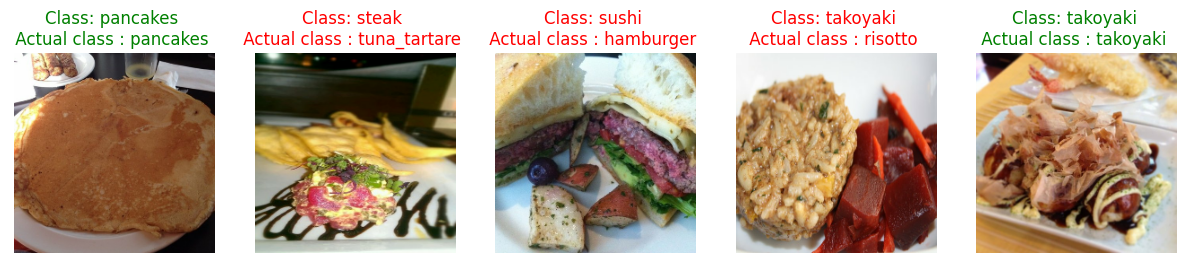

2025-02-07 12:09:26.638119: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
DisplayModelPredictions(model_50e_mixaug,train_11_dataset,class_names)